# Optical properties of a lightsail made of N slabs of FeS2

Slabs of FeS2 have a thickness of $d_1$ and are separated by layers of ideal aerogel (dielectric constant equal to the one of the vacuum and 0 density) of thickness $d_2$. 

Let a stack of $N$ slabs separated by aerogel layers.

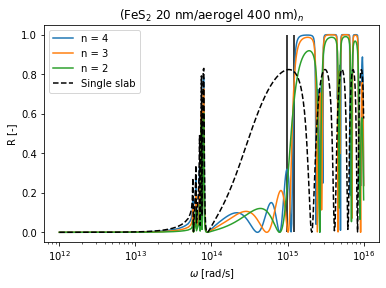

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def computeN(omega) :
    """
    @pre : omega is a vector of angular frequencies
    @post : return the complex refraction index vector of FeS2 for each of the frequencies provided in omega 
    """
    #prodvided data
    epsilonInfinity1 = 19.17402283496171
    epsilonInfinity2 = 22.09805938253293
    epsilonInfinity3 = 20.60710234103419
    f11 = 4.213279900760202 
    f21 = 1.961693284797713
    f31 = 0.007966945581503451
    omegaTO11 = 79231717132503.97
    omegaTO21 = 57563096713280.8
    omegaTO31 = 49033016471727.84
    gamma11 = 151929351721.5274
    gamma21 = 151947673655.9077
    gamma31 = 156461516099.8209
    f22 = 2.318085089104123
    f32 = 1.935048918661783
    omegaTO22 = 70373122741473.44
    omegaTO32 = 62330594312793.54
    gamma22 = 151959123549.7535
    gamma32 = 151954274514.8117
    f23 = 3.803690401550578
    f33 = 6.832435225656633
    omegaTO23 = 73806724238431.17
    omegaTO33 = 77733154461442.81
    gamma23 = 151930325428.5151
    gamma33 = 151936692746.3015
    eps11 = epsilonInfinity1 + (f11 * omegaTO11**2)/(omegaTO11**2 - omega**2 - 1j*omega*gamma11)
    eps22 = epsilonInfinity2 + (f21 * omegaTO21**2)/(omegaTO21**2 - omega**2 - 1j*omega*gamma21)+(f22 * omegaTO22**2)/(omegaTO22**2 - omega**2 - 1j*omega*gamma22)+(f23 * omegaTO23**2)/(omegaTO23**2 - omega**2 - 1j*omega*gamma23)
    eps33 = epsilonInfinity3 + (f31 * omegaTO31**2)/(omegaTO31**2 - omega**2 - 1j*omega*gamma31)+(f32 * omegaTO32**2)/(omegaTO32**2 - omega**2 - 1j*omega*gamma32)+(f33 * omegaTO33**2)/(omegaTO33**2 - omega**2 - 1j*omega*gamma33)
    #(complex) epsilon_iso + real and imaginary parts
    epsiloniso = (eps11+eps22+eps33)/3
    epsilonIsoReal = np.array([x.real for x in epsiloniso])
    epsilonIsoImg = np.array([x.imag for x in epsiloniso])
    #real and imaginary parts of the refraction index
    n = 1/(2**(1/2))*(epsilonIsoReal + (epsilonIsoReal**2+epsilonIsoImg**2)**(1/2))**(1/2)
    kappa = 1/(2**(1/2))*(-epsilonIsoReal + (epsilonIsoReal**2+epsilonIsoImg**2)**(1/2))**(1/2)
    #complex refraction index
    ncomp = np.zeros(len(omega),dtype='clongdouble')
    for i in range(len(ncomp)) : 
        ncomp[i] = n[i]-1j*kappa[i]
    return ncomp
    
def computeNk(omega,N,n) : 
    """
    @pre : phi0 is a float value representing the incidence angle
           omega is a vector (numpy.array) of angular frequencies (float)
           N is an integer representing the number of layers (vacuum,FeS2,aerogel) in the stack
    @post : returns the complex index of refraction vector for each slab in the stack.
    """
    #air (vacuum) and aerogel complex index of refraction
    N0 = np.ones(len(omega),dtype='clongdouble')
    Nk = np.zeros((N,len(omega)),dtype='clongdouble')
    for k in range(N) :
        if k == 0 or k == N-1 or k%2 == 0:
            Nk[k] = N0
        else :
            Nk[k] = n
    return Nk
    
def computeDk(N,d1,d2) : 
    """
    @pre : N is an integer representing the number of layers (FeS2,aerogel) in the stack
           d1 is a float representing the thickness of the FeS2 layers in micrometers
           d2 is a float the thickness of the aerogel layers in micrometers
    @post : return the vector of thicknesses for each layer of the stack 
    """
    dk = np.zeros(N)
    for k in range(N) :
        if k%2 == 0 : 
            dk[k] = d1
        else : 
            dk[k] = d2
    return dk
    
def computePhik(N,phi0,Nk) : 
    """
    @pre : N is an integer representing the number of layers (vacuum,FeS2,aerogel) in the stack
           phi0 is a vector of complex floats representing the first incidence angle
    @post : returns the vector of incidence angles for each layer (FeS2, aerogel) computed thanks to the Fresnel law
    """
    phik = np.zeros((N,len(omega)),dtype='clongdouble')
    for k in range(N) :
        if k == 0 : 
            phik[k] = phi0
        else : 
            phik[k] = np.arcsin(Nk[k-1]*np.sin(phik[k-1])/Nk[k])
    return phik
    
def computeBetak(N,n,omega,d1,d2,phi0) :
    """
    @pre : N is an integer representing the number of layers (FeS2,aerogel) in the stack
           omega is a vector of float values representing angular frequencies
           d1 is a float representing the thickness of the FeS2 layers in micrometers
           d2 is a float the thickness of the aerogel layers in micrometers
           phi0 is a float reprensting the first incidence angle
    @post : return the vector of  for each layer of the stack
    """
    Nk = computeNk(omega,N+2,n)
    dk = computeDk(N,d1,d2)
    phik = computePhik(N+2,phi0,Nk)
    lamb = 3e14/omega
    betak = np.zeros((N,len(omega)),dtype='clongdouble')
    for k in range(N) :
        betak[k] = Nk[k+1]*dk[k]*np.cos(phik[k+1])/lamb
    return betak

def computeL(d1,d2,N,phi0,omega) :
    """
    @pre : N is an integer representing the number of layers (FeS2,aerogel) in the stack
           omega is a vector of float values representing angular frequencies
           d1 is a float representing the thickness of the FeS2 layers in micrometers
           d2 is a float the thickness of the aerogel layers in micrometers
           phi0 is a float reprensting the first incidence angle
    @post : returns the vector of L matrixes for each layer
    """
    L = np.zeros((N,2,2,len(omega)),dtype='clongdouble')
    betak = computeBetak(N,n,omega,d1,d2,phi0)
    for k in range(N) :
        L[k,:,:,:] = np.array([[np.exp(0+1j*betak[k]),np.zeros(len(omega))],[np.zeros(len(omega)),np.exp(0-1j*betak[k])]],dtype='cdouble')
    return L

def computeTk(Nk,phik,N) :
    """
    @pre : Nk is a vector of complex floats representing the complex index of refraction for each layer of the stack
           phik is a vector of complex floats reprensenting the complex angle of incidence for each layer of the stack
           N is an integer representing the number of interfaces in the stack
    @post : returns the vector of the complex Fresnel transmission coefficients in the s and p polarizations, for each interface between the N layers
    """
    tks = np.zeros((N,len(Nk[0])),dtype='clongdouble')
    tkp = np.zeros((N,len(Nk[0])),dtype='clongdouble')
    for k in range(N) : 
        tkp[k] = (2*Nk[k]*np.cos(phik[k]))/(Nk[k+1]*np.cos(phik[k])+Nk[k]*np.cos(phik[k+1]))
        tks[k] = (2*Nk[k]*np.cos(phik[k]))/(Nk[k]*np.cos(phik[k])+Nk[k+1]*np.cos(phik[k+1]))
    return tks,tkp

def computeRk(Nk,phik,N) :
    """
    @pre : Nk is a vector of complex floats representing the complex index of refraction for each layer of the stack
           phik is a vector of complex floats reprensenting the complex angle of incidence for each layer of the stack
           N is an integer representing the number of interfaces in the stack
    @post : returns the vector of the complex Fresnel reflection coefficients in the s and p polarizations, for each interface between the N layers
    """
    rks = np.zeros((N,len(Nk[0])),dtype='clongdouble')
    rkp = np.zeros((N,len(Nk[0])),dtype='clongdouble')
    for k in range(N) : 
        rks[k] = (Nk[k]*np.cos(phik[k])-Nk[k+1]*np.cos(phik[k+1]))/(Nk[k]*np.cos(phik[k])+Nk[k+1]*np.cos(phik[k+1]))
        rkp[k] = (Nk[k+1]*np.cos(phik[k])-Nk[k]*np.cos(phik[k+1]))/(Nk[k+1]*np.cos(phik[k])+Nk[k]*np.cos(phik[k+1]))
    return rks,rkp
    
def computeI(N,n,phi0,omega) : 
    """
    @pre : N is an integer representing the number of interfaces in the stack
           phi0 is a float reprensting the first incidence angle
           omega is a vector of float values representing angular frequencies
    @post : returns the vector of I matrixes in the s and p polarizations, computed for each interface between the N layers of the stack 
    """
    Is = np.zeros((N,2,2,len(omega)),dtype='clongdouble')
    Ip = np.zeros((N,2,2,len(omega)),dtype='clongdouble')
    Nk = computeNk(omega,N+1,n)
    phik = computePhik(N+1,phi0,Nk)
    tks,tkp = computeTk(Nk,phik,N)
    rks,rkp = computeRk(Nk,phik,N)
    for k in range(len(Is)) :
        Is[k] = 1/tks[k]*np.array([[np.ones(len(omega)),rks[k]],[rks[k],np.ones(len(omega))]],dtype='cdouble')
        Ip[k] = 1/tkp[k]*np.array([[np.ones(len(omega)),rkp[k]],[rkp[k],np.ones(len(omega))]],dtype='cdouble')
    return Is,Ip

def computeS(d1,d2,N,n,phi0,omega) : 
    """
    @pre : N is an integer representing the number of layers (FeS2,aerogel) in the stack
           phi0 is a float reprensting the first incidence angle
           omega is a vector of float values representing angular frequencies
           d1 is a float representing the thickness of the FeS2 layers in micrometers
           d2 is a float the thickness of the aerogel layers in micrometers
           n is a complex float value representing the complex index of refraction of FeS2 
    @post : returns the vector of I matrixes in the s and p polarizations, computed for each interface between the N layers of the stack 
    """
    Is,Ip = computeI(N+1,n,phi0,omega)
    L = computeL(d1,d2,N,phi0,omega)
    Ss = np.array([[np.ones(len(omega)),np.zeros(len(omega))],[np.zeros(len(omega)),np.ones(len(omega))]],dtype='clongdouble')#np.ones((2,2,len(omega)),dtype='clongdouble')
    Sp = np.array([[np.ones(len(omega)),np.zeros(len(omega))],[np.zeros(len(omega)),np.ones(len(omega))]],dtype='clongdouble')#np.ones((2,2,len(omega)),dtype='clongdouble')
    #on remplit le tenseur feuillet par feuillet pour chaque valeur de omega
    for i in range(len(omega)) :
        #pour un feuillet (omega donné) : 
        for j in range(N) :
            Ss[:,:,i] = (Ss[:,:,i]@Is[j,:,:,i])@L[j,:,:,i]
            Sp[:,:,i] = (Sp[:,:,i]@Ip[j,:,:,i])@L[j,:,:,i]
        Ss[:,:,i] = Ss[:,:,i]@Is[N,:,:,i]
        Sp[:,:,i] = Sp[:,:,i]@Ip[N,:,:,i]
    return Ss,Sp
        
def computeRT(d1,d2,N,n,phi0,omega) : 
    #if we have N slabs of FeS2, we have a stack of N*2-1 layers : N slabs of FeS2, N-1 layers of aerogel
    N = 2*N-1
    Ss, Sp = computeS(d1,d2,N,n,phi0,omega)
    S_21_s = Ss[1][0] 
    S_11_s = Ss[0][0]
    S_21_p = Sp[1][0]
    S_11_p = Sp[0][0]
    #complex reflectance and transmittance 
    rs = S_21_s/S_11_s
    rp = S_21_p/S_11_p
    ts = 1/S_11_s
    tp = 1/S_11_p
    #polarized reflectivity and transmittivity coefficients
    Rs = abs(rs)**2
    Rp = abs(rp)**2
    Ts = abs(ts)**2
    Tp = abs(tp)**2
    #final results
    R = 0.5*Rs+0.5*Rp
    T = 0.5*Ts+0.5*Tp
    return (R,T)

d1 = 0.02
d2 = 0.4
N = range(2,5)
#range de fréquences angulaires [rad/s]
omegaG = 1.338e15
#nombre de samples in omega
nsamples = 500
omega = np.logspace(12,16,nsamples)
phi0 = np.ones(len(omega),dtype='clongdouble')*0
n = computeN(omega)
for i in N[::-1] :
    R,T = computeRT(d1,d2,i,n,phi0,omega)
    plt.plot(omega,R,label="n = {0}".format(i))
plt.xscale('log')
plt.title(r'(FeS$_2$ 20 nm/aerogel 400 nm)$_n$')
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel('R [-]')
plt.vlines(9.832e14,0,1,'k')
plt.vlines(0.9*omegaG,0,1,'k')
d1 = 0.1
R,T = computeRT(d1,d2,1,n,phi0,omega)
plt.plot(omega,R,'--',color="black",label="Single slab".format(i))
plt.legend()
plt.savefig('nstack.pdf')
plt.show()